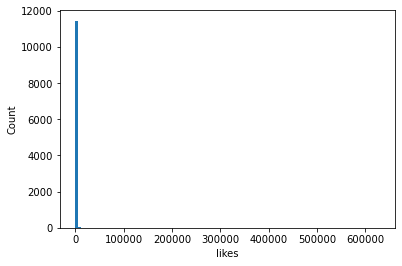

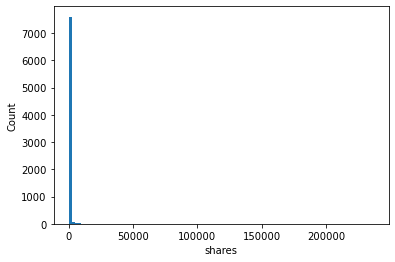

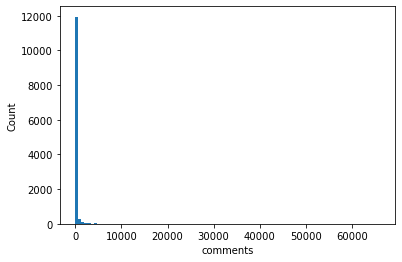

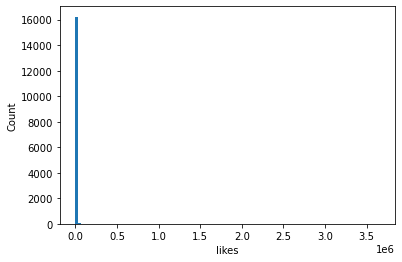

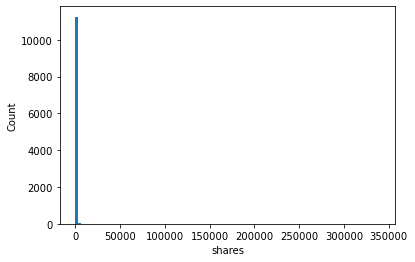

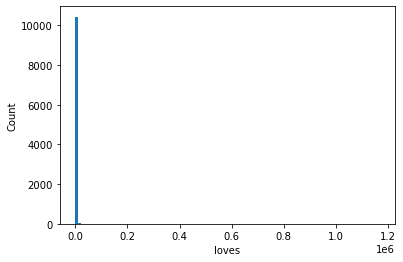

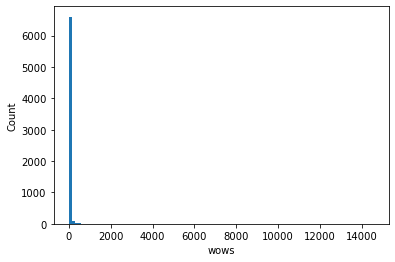

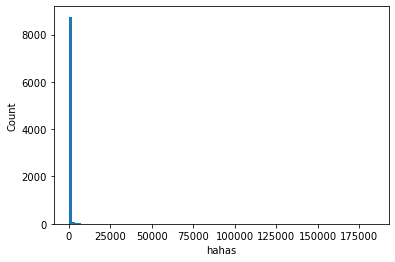

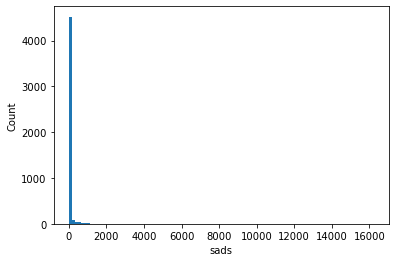

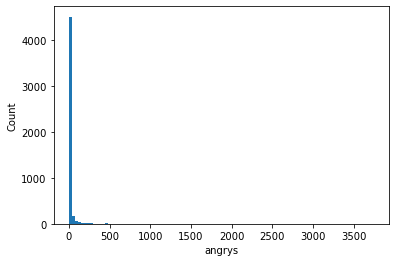

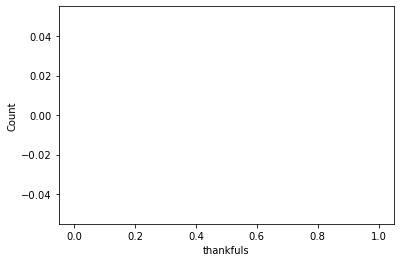

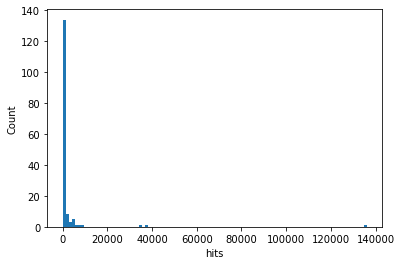

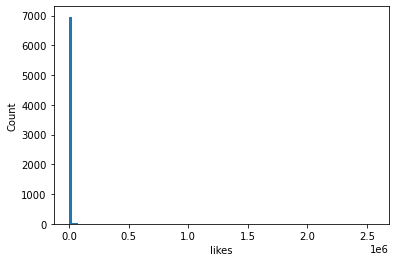

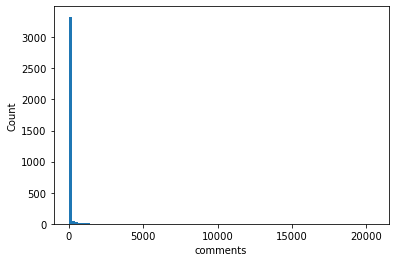

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string
#import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

twitter = pd.read_csv("twitter_cleaned.csv", index_col = 0)
instagram = pd.read_csv("instagram_cleaned.csv", index_col = 0)
facebook = pd.read_csv("facebook_cleaned.csv", index_col = 0)

#Plots probably not useful
for variable in ['likes', 'shares']:
    plt.hist(twitter[twitter[variable] > 0][variable], bins = 100);
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

# for variable in ['comments', 'likes', 'shares', 'loves', 'wows', 'hahas', 'sads', 'angrys', 'thankfuls']:
#     plt.hist(facebook[facebook[variable] > 0][variable], bins = 100);
#     plt.xlabel(variable)
#     plt.ylabel('Count')
#     plt.show()

# for variable in ['hits', 'likes', 'comments']:
#     plt.hist(instagram[instagram[variable] > 0][variable], bins = 100);
#     plt.xlabel(variable)
#     plt.ylabel('Count')
#     plt.show()


In [ ]:
#Examine descriptive stats instead
a = twitter.describe()
b = instagram.describe()
c = facebook.describe()

#Investigate outliers
#How many st-devs from mean are they?
#What does the distribution look like? Skewness?

In [40]:
#Tokenised content
twitter['tokens'] = twitter['content'].str.lower().apply(word_tokenize)
instagram['tokens'] = instagram['content'].str.lower().apply(word_tokenize)
facebook['tokens'] = facebook['content'].str.lower().apply(word_tokenize)


In [41]:
facebook.head()


,content,from,date,by,comments,likes,shares,loves,wows,hahas,sads,angrys,thankfuls,tokens
0,Visit us at https://asiatimes.com/Premium con...,Asia Times,22/12/2022 16:24,Asia Times,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[visit, us, at, https, :, //asiatimes.com/prem..."
1,"With a capacity of over 68,000 seats, Al Bayt ...",HISTORY,9/12/2022 18:00,HISTORY,3.0,177.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,"[with, a, capacity, of, over, 68,000, seats, ,..."
2,Visit us at https://asiatimes.com/Premium con...,Asia Times,16/11/2022 13:24,Asia Times,0.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,"[visit, us, at, https, :, //asiatimes.com/prem..."
3,What a game! #Argentina defeated the defending...,Hisense,19/12/2022 8:23,Hisense,8.0,193.0,13.0,16.0,0.0,1.0,0.0,2.0,0.0,"[what, a, game, !, #, argentina, defeated, the..."
4,UPDATE: Spain run riot over Costa Rica to go t...,Daily Monitor,24/11/2022 2:01,Daily Monitor,13.0,228.0,2.0,3.0,6.0,2.0,0.0,0.0,0.0,"[update, :, spain, run, riot, over, costa, ric..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

twitter_corpus = twitter.content.tolist()


vec = TfidfVectorizer(stop_words='english', max_features= 25)
matrix=vec.fit_transform(twitter_corpus)